# Telecom churn case study

In [50]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import datetime

import matplotlib.pyplot as plt 

from sklearn.model_selection import GridSearchCV

## Reading the data

In [51]:
#Reading the data
telecom = pd.read_csv("telecom_churn_data.csv", sep=",", encoding="ISO-8859-1", header=0)

In [52]:
#To display all rows and columns
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [53]:
telecom.shape

(99999, 226)

In [54]:
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [55]:
telecom.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

## Data cleaning & Deriving new metrics

#### Removing columns with same value throughout

In [56]:
telecom.nunique()

mobile_number               99999
circle_id                       1
loc_og_t2o_mou                  1
std_og_t2o_mou                  1
loc_ic_t2o_mou                  1
last_date_of_month_6            1
last_date_of_month_7            1
last_date_of_month_8            1
last_date_of_month_9            1
arpu_6                      85681
arpu_7                      85308
arpu_8                      83615
arpu_9                      79937
onnet_mou_6                 24313
onnet_mou_7                 24336
onnet_mou_8                 24089
onnet_mou_9                 23565
offnet_mou_6                31140
offnet_mou_7                31023
offnet_mou_8                30908
offnet_mou_9                30077
roam_ic_mou_6                6512
roam_ic_mou_7                5230
roam_ic_mou_8                5315
roam_ic_mou_9                4827
roam_og_mou_6                8038
roam_og_mou_7                6639
roam_og_mou_8                6504
roam_og_mou_9                5882
loc_og_t2t_mou

In [57]:
telecom = telecom.loc[:,telecom.apply(pd.Series.nunique) != 1] 
telecom.shape

(99999, 210)

#### Handling missing values

In [58]:
#Function to return colums with null values
def df_null() :
    null_cols = telecom.isnull().sum()
    return null_cols[null_cols!=0]

In [59]:
df_null()

onnet_mou_6                  3937
onnet_mou_7                  3859
onnet_mou_8                  5378
onnet_mou_9                  7745
offnet_mou_6                 3937
offnet_mou_7                 3859
offnet_mou_8                 5378
offnet_mou_9                 7745
roam_ic_mou_6                3937
roam_ic_mou_7                3859
roam_ic_mou_8                5378
roam_ic_mou_9                7745
roam_og_mou_6                3937
roam_og_mou_7                3859
roam_og_mou_8                5378
roam_og_mou_9                7745
loc_og_t2t_mou_6             3937
loc_og_t2t_mou_7             3859
loc_og_t2t_mou_8             5378
loc_og_t2t_mou_9             7745
loc_og_t2m_mou_6             3937
loc_og_t2m_mou_7             3859
loc_og_t2m_mou_8             5378
loc_og_t2m_mou_9             7745
loc_og_t2f_mou_6             3937
loc_og_t2f_mou_7             3859
loc_og_t2f_mou_8             5378
loc_og_t2f_mou_9             7745
loc_og_t2c_mou_6             3937
loc_og_t2c_mou

In [60]:
telecom[df_null().index].describe()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9
count,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000

Here, most of the columns having missing values, that means the customer has not opted for some package or have not made any such calls/msgs etc.

So for such columns we can impute it with 0

In [61]:
telecom.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 210 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   arpu_6                    float64
 2   arpu_7                    float64
 3   arpu_8                    float64
 4   arpu_9                    float64
 5   onnet_mou_6               float64
 6   onnet_mou_7               float64
 7   onnet_mou_8               float64
 8   onnet_mou_9               float64
 9   offnet_mou_6              float64
 10  offnet_mou_7              float64
 11  offnet_mou_8              float64
 12  offnet_mou_9              float64
 13  roam_ic_mou_6             float64
 14  roam_ic_mou_7             float64
 15  roam_ic_mou_8             float64
 16  roam_ic_mou_9             float64
 17  roam_og_mou_6             float64
 18  roam_og_mou_7             float64
 19  roam_og_mou_8             float64
 20  roam_og_mou_9             f

In [62]:
numeric = telecom.select_dtypes(exclude = object).columns
print(numeric)

categorical = telecom.select_dtypes(include = object).columns
print(categorical)

Index(['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=202)
Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9'],
      dtype='object')


In [63]:
telecom[numeric] = telecom[numeric].fillna(0)

In [64]:
df_null()

date_of_last_rech_6          1607
date_of_last_rech_7          1767
date_of_last_rech_8          3622
date_of_last_rech_9          4760
date_of_last_rech_data_6    74846
date_of_last_rech_data_7    74428
date_of_last_rech_data_8    73660
date_of_last_rech_data_9    74077
dtype: int64

In [65]:
telecom.shape

(99999, 210)

In [66]:
#Converting date columns to date dtype

telecom['date_of_last_rech_6'] = pd.to_datetime(telecom['date_of_last_rech_6'],format='%m/%d/%Y')
telecom['date_of_last_rech_7'] = pd.to_datetime(telecom['date_of_last_rech_7'],format='%m/%d/%Y')
telecom['date_of_last_rech_8'] = pd.to_datetime(telecom['date_of_last_rech_8'],format='%m/%d/%Y')

telecom['date_of_last_rech_data_6'] = pd.to_datetime(telecom['date_of_last_rech_data_6'],format='%m/%d/%Y')
telecom['date_of_last_rech_data_7'] = pd.to_datetime(telecom['date_of_last_rech_data_7'],format='%m/%d/%Y')
telecom['date_of_last_rech_data_8'] = pd.to_datetime(telecom['date_of_last_rech_data_8'],format='%m/%d/%Y')



In [67]:
telecom[categorical].describe()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
count,98392,98232,96377,95239,25153,25571,26339,25922
unique,30,31,31,30,30,31,31,30
top,2014-06-30 00:00:00,2014-07-31 00:00:00,2014-08-31 00:00:00,9/29/2014,2014-06-30 00:00:00,2014-07-31 00:00:00,2014-08-31 00:00:00,9/29/2014
freq,16960,17288,14706,22623,1888,1813,1998,2329
first,2014-06-01 00:00:00,2014-07-01 00:00:00,2014-08-01 00:00:00,NaN,2014-06-01 00:00:00,2014-07-01 00:00:00,2014-08-01 00:00:00,NaN
last,2014-06-30 00:00:00,2014-07-31 00:00:00,2014-08-31 00:00:00,NaN,2014-06-30 00:00:00,2014-07-31 00:00:00,2014-08-31 00:00:00,NaN


In [68]:
#Calculating number of days of last recharge

telecom['noofdays_of_last_rech_6'] = ((telecom['date_of_last_rech_6'].max() - telecom['date_of_last_rech_6'])/np.timedelta64(1, 'D'))
telecom['noofdays_of_last_rech_7'] = ((telecom['date_of_last_rech_7'].max() - telecom['date_of_last_rech_7'])/np.timedelta64(1, 'D'))
telecom['noofdays_of_last_rech_8'] = ((telecom['date_of_last_rech_8'].max() - telecom['date_of_last_rech_8'])/np.timedelta64(1, 'D'))

telecom['noofdays_of_last_rech_data_6'] = ((telecom['date_of_last_rech_data_6'].max() - telecom['date_of_last_rech_data_6'])/np.timedelta64(1, 'D'))
telecom['noofdays_of_last_rech_data_7'] = ((telecom['date_of_last_rech_data_7'].max() - telecom['date_of_last_rech_data_7'])/np.timedelta64(1, 'D'))
telecom['noofdays_of_last_rech_data_8'] = ((telecom['date_of_last_rech_data_8'].max() - telecom['date_of_last_rech_data_8'])/np.timedelta64(1, 'D'))


In [69]:
#Dropping dates as we already have calculated no of days 
telecom.drop(['date_of_last_rech_6','date_of_last_rech_7', 'date_of_last_rech_8','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'], axis = 1, inplace = True)

In [70]:
telecom.shape

(99999, 210)

In [71]:
#Imputing missing values with -1
days = ['noofdays_of_last_rech_6', 'noofdays_of_last_rech_7', 'noofdays_of_last_rech_8', 'noofdays_of_last_rech_data_6', 'noofdays_of_last_rech_data_7', 'noofdays_of_last_rech_data_8' ]
telecom[days] = telecom[days].fillna(-1)

In [72]:
df_null()

date_of_last_rech_9          4760
date_of_last_rech_data_9    74077
dtype: int64

## Data Preparation

### Filtering high valued customers

Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [73]:
# Computing total recharge amount in the good phase which is first 2 months
telecom['total_rech_amnt_6_data'] = telecom['av_rech_amt_data_6'] * telecom['total_rech_data_6']
telecom['total_rech_amnt_7_data'] = telecom['av_rech_amt_data_7'] * telecom['total_rech_data_7']

telecom['avg_rech_amt_data_good_phase'] = (telecom['total_rech_amnt_6_data'] + telecom['total_rech_amnt_7_data'])/2
telecom['avg_rech_amt_good_phase'] = (telecom['total_rech_amt_6'] + telecom['total_rech_amt_7'])/2

telecom['total_rech_amt_good_phase'] = telecom['avg_rech_amt_good_phase'] + telecom['avg_rech_amt_data_good_phase']

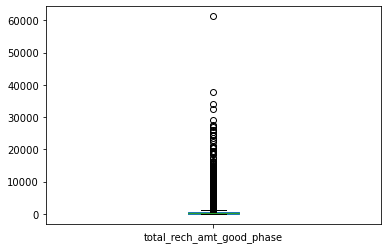

In [74]:
telecom['total_rech_amt_good_phase'].plot.box()

In [75]:
telecom['total_rech_amt_good_phase'].describe(percentiles = [.25,.5,.7,.75,1])

count    99999.000000
mean       485.328068
std        869.423594
min          0.000000
25%        128.000000
50%        275.000000
70%        478.000000
75%        553.000000
100%     61236.000000
max      61236.000000
Name: total_rech_amt_good_phase, dtype: float64

 ***Value of X (70th percentile value) is 478***

In [76]:
#Filtering customers whose recharge amount > 70th percentile of the average recharge amount in the first two months
telecom = telecom[telecom['total_rech_amt_good_phase'] >= np.percentile(telecom['total_rech_amt_good_phase'],70)]

In [77]:
telecom.shape

(30001, 215)

### Tagging churners

Tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase


In [78]:
telecom['usage_9'] = telecom['total_ic_mou_9'] + telecom['total_og_mou_9'] + telecom['vol_3g_mb_9'] + telecom['vol_2g_mb_9']

In [79]:
telecom[telecom['usage_9'] == 0].shape

(2441, 216)

In [80]:
#Labelling churned customers
telecom['churn'] = telecom['usage_9'].apply(lambda y : 1 if y == 0 else 0)

In [81]:
telecom['churn'].value_counts()

0    27560
1     2441
Name: churn, dtype: int64

### Removing all the attributes corresponding to the churn phase

In [82]:
cols = set(telecom.columns) - set(telecom.filter(regex='9$').columns)
cols

{'aon',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'aug_vbc_3g',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'avg_rech_amt_data_good_phase',
 'avg_rech_amt_good_phase',
 'churn',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'ic_others_6',
 'ic_others_7',
 'ic_others_8',
 'isd_ic_mou_6',
 'isd_ic_mou_7',
 'isd_ic_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'jul_vbc_3g',
 'jun_vbc_3g',
 'last_day_rch_amt_6',
 'last_day_rch_amt_7',
 'last_day_rch_amt_8',
 'loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2f_mou_7',
 'loc_ic_t2f_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_t2c_mou_6

In [83]:
telecom.shape

(30001, 217)

In [84]:
telecom = telecom[cols]

In [85]:
telecom.drop(['sep_vbc_3g'], axis = 1, inplace = True)

In [86]:
cols - set(telecom.columns)

{'sep_vbc_3g'}

In [87]:
telecom.head()

,loc_og_t2m_mou_7,sachet_2g_6,mobile_number,loc_ic_t2t_mou_7,roam_og_mou_7,loc_ic_t2m_mou_6,arpu_2g_7,offnet_mou_8,churn,max_rech_data_6,sachet_2g_7,std_ic_mou_8,spl_og_mou_7,vol_2g_mb_8,std_ic_t2f_mou_8,total_rech_num_6,std_ic_t2m_mou_7,arpu_3g_8,avg_rech_amt_data_good_phase,std_og_t2f_mou_8,noofdays_of_last_rech_6,monthly_2g_7,std_og_mou_7,std_ic_t2m_mou_8,noofdays_of_last_rech_data_7,total_og_mou_7,total_ic_mou_7,spl_og_mou_8,spl_og_mou_6,std_ic_mou_7,sachet_3g_7,total_rech_amt_7,std_ic_mou_6,vol_3g_mb_6,loc_og_t2m_mou_8,offnet_mou_7,max_rech_data_7,isd_og_mou_7,std_og_t2t_mou_8,loc_og_t2f_mou_8,count_rech_2g_6,std_og_t2t_mou_6,night_pck_user_6,std_og_t2t_mou_7,total_rech_num_7,roam_og_mou_6,std_og_mou_6,vol_3g_mb_7,arpu_3g_6,spl_ic_mou_6,monthly_3g_8,arpu_2g_8,arpu_8,std_og_t2f_mou_7,std_ic_t2t_mou_8,av_rech_amt_data_6,vol_2g_mb_6,total_rech_amt_good_phase,sachet_2g_8,noofdays_of_last_rech_8,night_pck_user_7,max_rech_amt_6,total_rech_data_8,sachet_3g_8,count_rech_3g_7,std_ic_t2m_mou_6,arpu_6,last_day_rch_amt_7,count_rech_2g_7,monthly_3g_7,loc_ic_t2f_mou_8,loc_og_mou_7,loc_ic_mou_6,ic_others_6,std_og_t2m_mou_8,arpu_7,total_rech_amnt_7_data,std_ic_t2t_mou_6,jul_vbc_3g,std_og_t2f_mou_6,std_ic_t2t_mou_7,aug_vbc_3g,spl_ic_mou_8,loc_og_t2c_mou_8,monthly_3g_6,noofdays_of_last_rech_7,count_rech_2g_8,vol_2g_mb_7,ic_others_8,loc_ic_t2t_mou_8,total_ic_mou_6,og_others_8,loc_og_mou_6,night_pck_user_8,max_rech_amt_7,roam_ic_mou_7,monthly_2g_6,loc_og_t2c_mou_7,loc_ic_t2f_mou_7,og_others_7,monthly_2g_8,std_ic_t2f_mou_7,ic_others_7,arpu_2g_6,loc_ic_t2f_mou_6,loc_og_t2t_mou_8,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2f_mou_6,vol_3g_mb_8,loc_ic_t2t_mou_6,total_rech_amt_6,total_og_mou_8,loc_og_mou_8,total_rech_data_6,fb_user_6,onnet_mou_8,std_og_t2m_mou_7,fb_user_7,loc_ic_mou_8,loc_ic_t2m_mou_8,total_rech_data_7,sachet_3g_6,aon,av_rech_amt_data_8,loc_og_t2c_mou_6,count_rech_3g_8,noofdays_of_last_rech_data_8,roam_ic_mou_8,loc_ic_t2m_mou_7,std_og_mou_8,noofdays_of_last_rech_data_6,max_rech_data_8,roam_ic_mou_6,avg_rech_amt_good_phase,isd_ic_mou_8,last_day_rch_amt_8,isd_og_mou_6,spl_ic_mou_7,loc_og_t2t_mou_7,isd_ic_mou_6,max_rech_amt_8,fb_user_8,total_og_mou_6,std_og_t2m_mou_6,std_ic_t2f_mou_6,count_rech_3g_6,total_ic_mou_8,total_rech_amnt_6_data,last_day_rch_amt_6,arpu_3g_7,onnet_mou_7,og_others_6,offnet_mou_6,onnet_mou_6,loc_ic_mou_7,loc_og_t2m_mou_6,total_rech_num_8,isd_ic_mou_7,av_rech_amt_data_7,loc_og_t2f_mou_7,total_rech_amt_8,isd_og_mou_8,jun_vbc_3g
0,0.00,0,7000842753,0.00,0.00,0.00,212.17,0.00,1,252.0,0,0.00,0.0,5.75,0.00,4,0.00,212.17,252.0,0.00,9.0,0,0.00,0.00,15.0,0.00,0.00,0.00,0.0,0.00,0,252,0.00,83.57,0.00,0.00,252.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,3,0.00,0.00,150.76,212.17,0.00,1,212.17,213.803,0.00,0.00,252.0,30.13,559.0,0,23.0,0.0,252,1.0,0,1.0,0.00,197.385,252,0.0,1,1.15,0.00,0.00,0.00,0.00,214.816,252.0,0.00,0.00,0.00,0.00,30.40,0.0,0.00,1,15.0,0.0,1.32,0.00,0.16,0.00,0.0,0.00,0.0,252,0.00,0,0.0,0.00,0.0,0,0.00,0.00,212.17,0.00,0.00,0.00,0.00,0.00,109.61,0.00,362,0.00,0.00,1.0,1.0,0.00,0.00,1.0,5.44,4.13,1.0,0,968,252.0,0.0,1.0,23.0,0.00,0.00,0.00,9.0,252.0,0.00,307.0,0.00,252,0.0,0.0,0.00,0.00,252,1.0,0.00,0.00,0.00,1.0,5.44,252.0,252,212.17,0.00,0.0,0.00,0.00,0.00,0.00,2,0.00,252.0,0.00,252,0.00,101.20
7,447.38,0,7000701601,32.26,12.59,217.56,0.00,325.91,1,0.0,0,193.94,0.0,0.00,22.21,5,126.99,0.00,0.0,16.68,3.0,0,75.14,141.33,-1.0,609.24,558.04,6.50,4.5,173.08,0,790,180.54,0.00,162.28,567.16,0.0,0.18,12.01,53.23,0.0,4.30,0.0,23.29,5,23.74,60.86,0.00,0.00,0.21,0,0.00,3171.480,20.08,30.39,0.0,0.00,1185.0,0,5.0,0.0,1580,0.0,0,0.0,91.44,1069.180,0,0.0,0,39.53,533.91,427.88,15.74,49.14,1349.850,0.0,36.89,19.38,6.66,11.83,57.74,0.0,0.00,0,6.0,0.0,0.00,15.14,27.31,626.46,0.0,422.16,0.0,790,33.49,0,0.0,101.46,0.0,0,34.24,15.19,0.00,152.16,40.28,38.06,51.39,62.13,0.00,58.14,1580,350.16,255.79,0.0,0.0,52.29,31.76,0.0,188.04,121.19,0.0,0,802,0.0,0.0,0.0,-1.0,31.64,221.49,77.84,-1.0,0.0,16.23,1185.0,31.59,779,0.0,0.0,31.38,2.06,1580,0.

In [88]:
telecom.info(verbose= True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 164 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   loc_og_t2m_mou_7              float64
 1   sachet_2g_6                   int64  
 2   mobile_number                 int64  
 3   loc_ic_t2t_mou_7              float64
 4   roam_og_mou_7                 float64
 5   loc_ic_t2m_mou_6              float64
 6   arpu_2g_7                     float64
 7   offnet_mou_8                  float64
 8   churn                         int64  
 9   max_rech_data_6               float64
 10  sachet_2g_7                   int64  
 11  std_ic_mou_8                  float64
 12  spl_og_mou_7                  float64
 13  vol_2g_mb_8                   float64
 14  std_ic_t2f_mou_8              float64
 15  total_rech_num_6              int64  
 16  std_ic_t2m_mou_7              float64
 17  arpu_3g_8                     float64
 18  avg_rech_amt_data_good_ph

In [89]:
telecom.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,loc_og_t2m_mou_7,sachet_2g_6,mobile_number,loc_ic_t2t_mou_7,roam_og_mou_7,loc_ic_t2m_mou_6,arpu_2g_7,offnet_mou_8,churn,max_rech_data_6,sachet_2g_7,std_ic_mou_8,spl_og_mou_7,vol_2g_mb_8,std_ic_t2f_mou_8,total_rech_num_6,std_ic_t2m_mou_7,arpu_3g_8,avg_rech_amt_data_good_phase,std_og_t2f_mou_8,noofdays_of_last_rech_6,monthly_2g_7,std_og_mou_7,std_ic_t2m_mou_8,noofdays_of_last_rech_data_7,total_og_mou_7,total_ic_mou_7,spl_og_mou_8,spl_og_mou_6,std_ic_mou_7,sachet_3g_7,total_rech_amt_7,std_ic_mou_6,vol_3g_mb_6,loc_og_t2m_mou_8,offnet_mou_7,max_rech_data_7,isd_og_mou_7,std_og_t2t_mou_8,loc_og_t2f_mou_8,count_rech_2g_6,std_og_t2t_mou_6,night_pck_user_6,std_og_t2t_mou_7,total_rech_num_7,roam_og_mou_6,std_og_mou_6,vol_3g_mb_7,arpu_3g_6,spl_ic_mou_6,monthly_3g_8,arpu_2g_8,arpu_8,std_og_t2f_mou_7,std_ic_t2t_mou_8,av_rech_amt_data_6,vol_2g_mb_6,total_rech_amt_good_phase,sachet_2g_8,noofdays_of_last_rech_8,night_pck_user_7,max_rech_amt_6,total_rech_data_8,sachet_3g_8,count_rech_3g_7,std_ic_t2m_mou_6,arpu_6,last_day_rch_amt_7,count_rech_2g_7,monthly_3g_7,loc_ic_t2f_mou_8,loc_og_mou_7,loc_ic_mou_6,ic_others_6,std_og_t2m_mou_8,arpu_7,total_rech_amnt_7_data,std_ic_t2t_mou_6,jul_vbc_3g,std_og_t2f_mou_6,std_ic_t2t_mou_7,aug_vbc_3g,spl_ic_mou_8,loc_og_t2c_mou_8,monthly_3g_6,noofdays_of_last_rech_7,count_rech_2g_8,vol_2g_mb_7,ic_others_8,loc_ic_t2t_mou_8,total_ic_mou_6,og_others_8,loc_og_mou_6,night_pck_user_8,max_rech_amt_7,roam_ic_mou_7,monthly_2g_6,loc_og_t2c_mou_7,loc_ic_t2f_mou_7,og_others_7,monthly_2g_8,std_ic_t2f_mou_7,ic_others_7,arpu_2g_6,loc_ic_t2f_mou_6,loc_og_t2t_mou_8,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2f_mou_6,vol_3g_mb_8,loc_ic_t2t_mou_6,total_rech_amt_6,total_og_mou_8,loc_og_mou_8,total_rech_data_6,fb_user_6,onnet_mou_8,std_og_t2m_mou_7,fb_user_7,loc_ic_mou_8,loc_ic_t2m_mou_8,total_rech_data_7,sachet_3g_6,aon,av_rech_amt_data_8,loc_og_t2c_mou_6,count_rech_3g_8,noofdays_of_last_rech_data_8,roam_ic_mou_8,loc_ic_t2m_mou_7,std_og_mou_8,noofdays_of_last_rech_data_6,max_rech_data_8,roam_ic_mou_6,avg_rech_amt_good_phase,isd_ic_mou_8,last_day_rch_amt_8,isd_og_mou_6,spl_ic_mou_7,loc_og_t2t_mou_7,isd_ic_mou_6,max_rech_amt_8,fb_user_8,total_og_mou_6,std_og_t2m_mou_6,std_ic_t2f_mou_6,count_rech_3g_6,total_ic_mou_8,total_rech_amnt_6_data,last_day_rch_amt_6,arpu_3g_7,onnet_mou_7,og_others_6,offnet_mou_6,onnet_mou_6,loc_ic_mou_7,loc_og_t2m_mou_6,total_rech_num_8,isd_ic_mou_7,av_rech_amt_data_7,loc_og_t2f_mou_7,total_rech_amt_8,isd_og_mou_8,jun_vbc_3g
count,30001.000000,30001.000000,3.000100e+04,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001

In [90]:
#Removing outliers for all the numeric variables except target variable

cont_cols = [col for col in telecom.columns if col not in ['churn','mobile_number']]

telecom_out = telecom[cont_cols]
print(telecom_out.shape)
Q1 = telecom_out.quantile(0.05)
Q3 = telecom_out.quantile(0.99)
IQR = Q3 - Q1
print(IQR)

telecom_out = telecom_out[~((telecom_out < (Q1 - 1.5 * IQR)) |(telecom_out > (Q3 + 1.5 * IQR))).any(axis=1)]
print(telecom_out.shape)

(30001, 162)
loc_og_t2m_mou_7                1111.480
sachet_2g_6                       12.000
loc_ic_t2t_mou_7                 660.790
roam_og_mou_7                    438.590
loc_ic_t2m_mou_6                1010.580
arpu_2g_7                        758.580
offnet_mou_8                    2193.130
max_rech_data_6                  455.000
sachet_2g_7                       12.000
std_ic_mou_8                     539.410
spl_og_mou_7                      76.030
vol_2g_mb_8                     1447.740
std_ic_t2f_mou_8                  45.930
total_rech_num_6                  44.000
std_ic_t2m_mou_7                 389.530
arpu_3g_8                        794.930
avg_rech_amt_data_good_phase    5096.000
std_og_t2f_mou_8                  35.190
noofdays_of_last_rech_6           20.000
monthly_2g_7                       2.000
std_og_mou_7                    2862.540
std_ic_t2m_mou_8                 355.430
noofdays_of_last_rech_data_7      30.000
total_og_mou_7                  3280.960
tot

In [91]:
churn = telecom['churn']
churn.head()

0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int64

In [92]:
telecom_new = pd.merge(telecom_out,churn ,left_index = True,right_index = True, how = 'inner')
telecom_new.shape

(27528, 163)

In [93]:
telecom = telecom_new
telecom.shape

(27528, 163)

### Checking churn rate

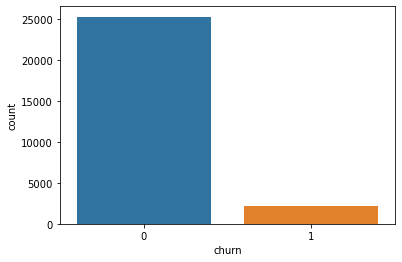

In [94]:
sns.countplot(telecom['churn'])

In [95]:
churn = (sum(telecom['churn'])/len(telecom['churn'].index))*100
churn

8.086312118570183

In the existing dataset only churn rate is only 8%. As there is imbalance in the class labels using smote-oversampling to handle that

### Handling class imbalance

In [96]:
# Putting feature variable to X
X = telecom.drop(['churn'],axis=1)

# Putting response variable to y
y = telecom['churn']

y.head()

0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int64

In [97]:
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X, y)

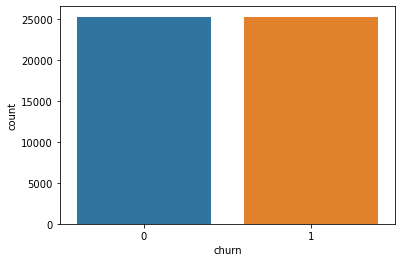

In [98]:
sns.countplot(y_smote)

### Train test split

In [99]:
# Splitting the data into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smote,y_smote, train_size=0.7,test_size=0.3,random_state=100)

### Scaling the data

In [100]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

## PCA

In [101]:
from sklearn.decomposition import PCA
pca = PCA(random_state = 54)

In [102]:
pca.fit(X_train_scaled)

PCA(random_state=54)

In [103]:
pca.components_

array([[-6.60943860e-03,  4.25893100e-02,  1.03087149e-03, ...,
         1.63012202e-03, -5.31834718e-04,  3.16139165e-02],
       [ 5.64522057e-02, -4.97285109e-02,  3.06606514e-02, ...,
         1.10167024e-01,  2.82903794e-03, -1.55335355e-02],
       [ 6.59854589e-02, -6.66562727e-02,  3.68760879e-02, ...,
         7.09015981e-02,  2.88280752e-03,  5.57900083e-02],
       ...,
       [-0.00000000e+00,  6.66164682e-16,  5.34531000e-14, ...,
         1.50920942e-16, -3.05148701e-16,  2.34187669e-17],
       [-0.00000000e+00,  2.77564080e-17, -2.21292278e-13, ...,
         3.51281504e-17,  8.23749706e-16, -1.75098651e-17],
       [ 0.00000000e+00,  3.26128013e-16, -2.10767538e-13, ...,
         2.42861287e-16,  2.46856572e-15, -1.90819582e-16]])

In [104]:
pca.explained_variance_ratio_

array([3.51416681e-01, 8.41468178e-02, 5.49191600e-02, 4.80797910e-02,
       4.31579643e-02, 3.69727298e-02, 3.00737691e-02, 2.22471412e-02,
       2.05676773e-02, 1.87005688e-02, 1.79202441e-02, 1.66934667e-02,
       1.26808842e-02, 1.26634567e-02, 1.08459264e-02, 1.07449827e-02,
       9.75636002e-03, 8.68307613e-03, 7.73465095e-03, 7.35221920e-03,
       7.12571065e-03, 6.78499594e-03, 6.53979381e-03, 5.89653324e-03,
       5.77334667e-03, 5.60564883e-03, 5.28039878e-03, 5.01099382e-03,
       4.74357813e-03, 4.46602538e-03, 4.25637894e-03, 4.07572042e-03,
       3.91643631e-03, 3.82636167e-03, 3.52129756e-03, 3.41482535e-03,
       3.31388091e-03, 3.27502881e-03, 3.11847573e-03, 2.89936656e-03,
       2.72331937e-03, 2.65622224e-03, 2.46278858e-03, 2.40328290e-03,
       2.36689721e-03, 2.32698969e-03, 2.13601479e-03, 2.09839638e-03,
       2.06802677e-03, 2.04661049e-03, 1.99731521e-03, 1.95103547e-03,
       1.91409345e-03, 1.87952613e-03, 1.86841213e-03, 1.84856368e-03,
      

In [105]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

In [106]:
pca_final = PCA(0.9)

In [107]:
X_train_pca = pca_final.fit_transform(X_train_scaled)

In [108]:
X_train_pca.shape

(35422, 35)

In [109]:
corrmat = np.corrcoef(X_train_pca.transpose())

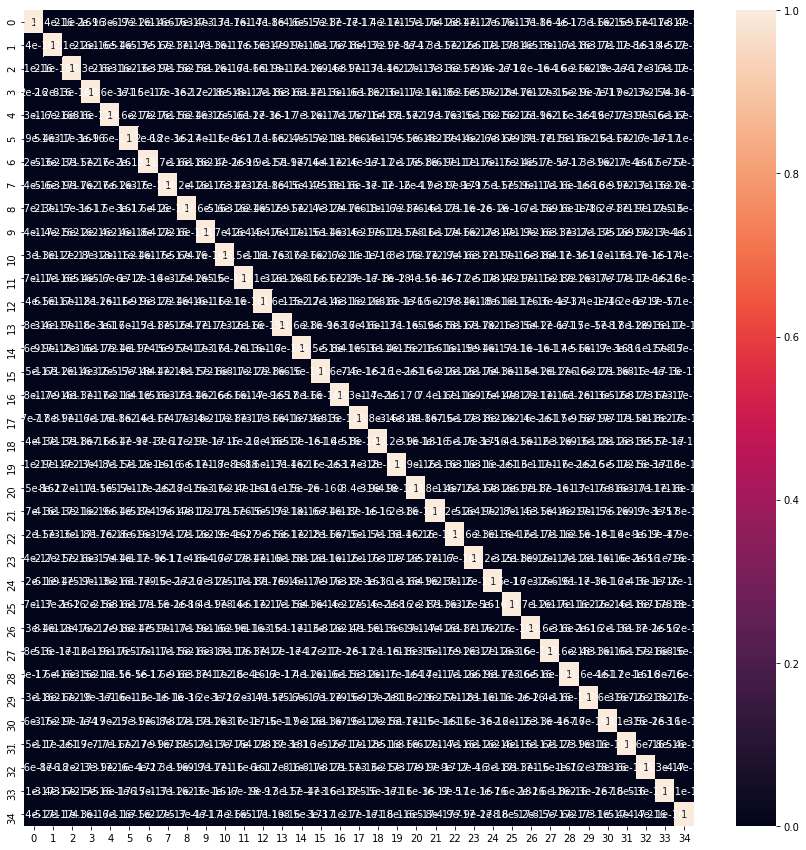

In [110]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

In [111]:
X_test_scaled = scaler.transform(X_test)
X_test_pca = pca_final.transform(X_test_scaled)

### Modelling

### Logistic Regression

In [112]:
from sklearn.linear_model import LogisticRegression

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(X_train_pca, y_train)



In [113]:
pred_probs_test = model_pca.predict_proba(X_test_pca)
y_prob_test_df = pd.DataFrame(pred_probs_test)
y_prob_test = y_prob_test_df.iloc[:,[1]]

y_test_df = pd.DataFrame(y_test)
y_test_df['CustID'] = y_test_df.index
y_prob_test.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_test = pd.concat([y_test_df,y_prob_test],axis=1)
y_pred_test= y_pred_test.rename(columns={ 1 : 'churn_prob'})
y_pred_test = y_pred_test[['CustID','churn','churn_prob']]
y_pred_test.head()

,CustID,churn,churn_prob
0,5268,0,0.139871
1,43363,1,0.925628
2,50241,1,0.841450
3,7083,0,0.286966
4,11414,0,0.087090


In [114]:
pred_probs_train = model_pca.predict_proba(X_train_pca)
y_prob_train_df = pd.DataFrame(pred_probs_train)
y_prob_train = y_prob_train_df.iloc[:,[1]]

y_train_df = pd.DataFrame(y_train)
y_train_df['custID'] = y_train_df.index
y_prob_train.reset_index(drop=True, inplace=True)
y_train_df.reset_index(drop=True, inplace=True)
y_pred_train = pd.concat([y_train_df,y_prob_train],axis=1)
y_pred_train = y_pred_train.rename(columns={ 1 : 'churn_prob'})
y_pred_train = y_pred_train[['custID','churn','churn_prob']]
y_pred_train.head()

,custID,churn,churn_prob
0,18261,0,0.002198
1,34189,1,0.870954
2,27666,1,0.986583
3,45610,1,0.875625
4,26748,0,0.802333


In [115]:
y_pred_train['predicted'] = y_pred_train.churn_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_pred_train.head()

,custID,churn,churn_prob,predicted
0,18261,0,0.002198,0
1,34189,1,0.870954,1
2,27666,1,0.986583,1
3,45610,1,0.875625,1
4,26748,0,0.802333,1


In [116]:
from sklearn import metrics
"{:2.2}".format(metrics.roc_auc_score(y_train, pred_probs_train[:,1]))

# Confusion matrix 
confusion = metrics.confusion_matrix(y_pred_train.churn, y_pred_train.predicted )
print(confusion)

[[14802  2950]
 [ 2443 15227]]


In [117]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_train[i]= y_pred_train.churn_prob.map(lambda x: 1 if x > i else 0)
y_pred_train.head()


,custID,churn,churn_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,18261,0,0.002198,0,1,0,0,0,0,0,0,0,0,0
1,34189,1,0.870954,1,1,1,1,1,1,1,1,1,1,0
2,27666,1,0.986583,1,1,1,1,1,1,1,1,1,1,1
3,45610,1,0.875625,1,1,1,1,1,1,1,1,1,1,0
4,26748,0,0.802333,1,1,1,1,1,1,1,1,1,1,0


In [118]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_pred_train.churn, y_pred_train[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.498843  1.000000  0.000000
0.1   0.1  0.714189  0.978608  0.450991
0.2   0.2  0.778951  0.956989  0.601735
0.3   0.3  0.817006  0.932201  0.702343
0.4   0.4  0.838829  0.902660  0.775293
0.5   0.5  0.847750  0.861743  0.833822
0.6   0.6  0.845746  0.813696  0.877648
0.7   0.7  0.827424  0.743011  0.911447
0.8   0.8  0.786969  0.629485  0.943725
0.9   0.9  0.653153  0.329315  0.975496


In [119]:
y_pred_train['LR_predicted'] = y_pred_train.churn_prob.map( lambda x: 1 if x > 0.4 else 0)

y_pred_train.head()

,custID,churn,churn_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,LR_predicted
0,18261,0,0.002198,0,1,0,0,0,0,0,0,0,0,0,0
1,34189,1,0.870954,1,1,1,1,1,1,1,1,1,1,0,1
2,27666,1,0.986583,1,1,1,1,1,1,1,1,1,1,1,1
3,45610,1,0.875625,1,1,1,1,1,1,1,1,1,1,0,1
4,26748,0,0.802333,1,1,1,1,1,1,1,1,1,1,0,1


In [120]:
y_pred_test['LR_predicted'] = y_pred_test.churn_prob.map( lambda x: 1 if x > 0.4 else 0)
y_pred_test.head()

,CustID,churn,churn_prob,LR_predicted
0,5268,0,0.139871,0
1,43363,1,0.925628,1
2,50241,1,0.841450,1
3,7083,0,0.286966,0
4,11414,0,0.087090,0


In [121]:
def model_metrics(x,y) :
    confusion_matrix = metrics.confusion_matrix(x,y)
    #print(confusion_matrix)
    total = sum(sum(confusion_matrix))
    accuracy = (confusion_matrix[0,0]+confusion_matrix[1,1])/total
    speci = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[0,1])
    sensi = confusion_matrix[1,1]/(confusion_matrix[1,0]+confusion_matrix[1,1])
    return accuracy,speci,sensi

In [122]:
model_performances = pd.DataFrame(index = ['Accuracy','Specificity','Sensitivity/Recall'])
model_performances.head()

""
Accuracy
Specificity
Sensitivity/Recall


In [123]:
model_performances['Logistic_Regression_Train'] = model_metrics(y_pred_train.churn, y_pred_train.LR_predicted)
model_performances['Logistic_Regression_Test'] = model_metrics(y_pred_test.churn, y_pred_test.LR_predicted)
model_performances

,Logistic_Regression_Train,Logistic_Regression_Test
Accuracy,0.838829,0.838295
Specificity,0.775293,0.776821
Sensitivity/Recall,0.902660,0.899109


### Random Forest

In [124]:
from sklearn.ensemble import RandomForestClassifier

In [125]:
rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)

In [126]:
%%time
rf.fit(X_train_pca, y_train)

Wall time: 1.5 s


RandomForestClassifier(max_depth=4, max_features=5, n_estimators=10,
                       oob_score=True, random_state=100)

In [127]:
rf.oob_score_

0.7738128846479589

In [128]:
y_pred_train = rf.predict(X_train_pca)
y_pred_train

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [129]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [130]:

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")




In [131]:
%%time
grid_search.fit(X_train_pca, y_train)


Fitting 4 folds for each of 120 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   38.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 14.7min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 16.8min finished


Wall time: 16min 58s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [132]:
grid_search.best_score_

rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

In [133]:
y_pred_train = rf_best.predict(X_train_pca)
y_pred_test = rf_best.predict(X_test_pca)

In [134]:
model_performances['Random_Forest_Train'] = model_metrics(y_train, y_pred_train)
model_performances['Random_Forest_Test'] = model_metrics(y_test, y_pred_test)
model_performances

,Logistic_Regression_Train,Logistic_Regression_Test,Random_Forest_Train,Random_Forest_Test
Accuracy,0.838829,0.838295,0.975326,0.921025
Specificity,0.775293,0.776821,0.961582,0.906887
Sensitivity/Recall,0.902660,0.899109,0.989134,0.935010


### XGBoost

In [137]:
import xgboost as xgb


xgclf = xgb.XGBClassifier(random_state=42, n_jobs=-1, eval_metric = 'error')

xgclf.fit(X_train_pca, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='error',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [138]:
print('AUC on train data by XGBoost =', metrics.roc_auc_score(y_true=y_train,
                                                              y_score=xgclf.predict_proba(X_train_pca)[:, 1]))
print('AUC on test data by XGBoost =', metrics.roc_auc_score(y_true=y_test,
                                                             y_score=xgclf.predict_proba(X_test_pca)[:, 1]))

AUC on train data by XGBoost = 0.9984436245161598
AUC on test data by XGBoost = 0.9801037197856359


In [139]:
from sklearn.model_selection import RandomizedSearchCV

xgb_model = xgb.XGBClassifier(random_state=42, n_jobs=-1, eval_metric='error')
parameters = {'learning_rate': [0.1, 0.3, 0.5],
              'max_depth': [2, 4, 6, 8, 10],
              'min_child_weight': [1, 3, 5, 7],
              'n_estimators': [50, 100, 150]}


clf_xgb = RandomizedSearchCV(estimator=xgb_model,
                             param_distributions = parameters,
                             n_jobs=-1,
                             n_iter = 10,
                             cv=3,
                             scoring='accuracy')


In [140]:
%%time
clf_xgb.fit(X_train_pca, y_train)

Wall time: 10min 19s


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           eval_metric='error', gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=-1,
                                           num_parallel_tree=None,
                                          

In [141]:
print(clf_xgb.best_params_)
print(clf_xgb.best_score_)
print(clf_xgb.best_estimator_)

{'n_estimators': 150, 'min_child_weight': 3, 'max_depth': 8, 'learning_rate': 0.5}
0.9402913227489181
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='error',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.5, max_delta_step=0,
              max_depth=8, min_child_weight=3, missing=nan,
              monotone_constraints='()', n_estimators=150, n_jobs=-1,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)


In [142]:
final_model = clf_xgb.best_estimator_

final_model.fit(X_train_pca, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='error',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.5, max_delta_step=0,
              max_depth=8, min_child_weight=3, missing=nan,
              monotone_constraints='()', n_estimators=150, n_jobs=-1,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [143]:
print('AUC on train data by XGBoost =', metrics.roc_auc_score(y_true=y_train,
                                                              y_score=final_model.predict_proba(X_train_pca)[:, 1]))

print('AUC on test data by XGBoost =', metrics.roc_auc_score(y_true=y_test,
                                                             y_score=final_model.predict_proba(X_test_pca)[:, 1]))

AUC on train data by XGBoost = 1.0
AUC on test data by XGBoost = 0.9876778846821331


In [144]:
y_train_pred = final_model.predict(X_train_pca)
y_test_pred = final_model.predict(X_test_pca)

model_performances['XGBoost_Train'] = model_metrics(y_train,y_train_pred)
model_performances['XGBoost_Test'] = model_metrics(y_test,y_test_pred)

In [145]:
model_performances

,Logistic_Regression_Train,Logistic_Regression_Test,Random_Forest_Train,Random_Forest_Test,XGBoost_Train,XGBoost_Test
Accuracy,0.838829,0.838295,0.975326,0.921025,1.0,0.952641
Specificity,0.775293,0.776821,0.961582,0.906887,1.0,0.930199
Sensitivity/Recall,0.902660,0.899109,0.989134,0.935010,1.0,0.974843


**Recomendation for Model Selection**
1. Model XGBoost is overfitted.
2. Random forest performed better than XGBoost for customer churn analysis for this particular dataset, using PCA. Here the accuracy, sesnsitivity and recall is high with similar result for training and test dataset.
3. Logistic regression values are low with respect to random forest.

Hence, we can conclude that Ramdom forest is better model for this dataset.


### Finding important features

In [146]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [8,10,12],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [12, 15, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1,scoring='accuracy')


In [147]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  5.6min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [8, 10, 12],
                                        'max_features': [12, 15, 20],
                                        'min_samples_leaf': range(100, 400, 200),
                                        'min_samples_split': range(200, 500, 200),
                                        'n_estimators': [100, 200, 300]},
                   scoring='accuracy', verbose=1)

In [148]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9109592325155204 using {'n_estimators': 200, 'min_samples_split': 200, 'min_samples_leaf': 100, 'max_features': 20, 'max_depth': 12}


In [149]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=12, max_features=20, min_samples_leaf=100,
                       min_samples_split=200, n_estimators=200)

In [ ]:
rf = grid_search.best_estimator_
rf.fit(X_train, y_train)

In [ ]:
plt.figure(figsize=(15,40))
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(len(X.columns)).sort_values().plot(kind='barh', align='center')

### Conclusion:

1. As we can see all the important features are from 8th month data. Hence, we can say that 8th month data (Action phase data) has proven to be important for predicting the customer churn.

2. Telecom company needs to pay attention to the roaming rates. They need to provide good offers to the customers who are using services from a roaming zone.

3. The company needs to focus on the STD and ISD rates. Perhaps, the rates are too high. Provide them with some kind of STD and ISD packages.

4. To look into both of the issues stated above, it is desired that the telecom company collects customer query and complaint data and work on their services according to the needs of customers.